
# Project: World Development Indicators

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

The dataset that was selected for the analysis is for 100k medical appointments absence sheet. The appointments are all based in Brazil. The dataset contains information on the appointment details such as date and time, patient details and their attendance. Below is a break down of each column and its significance:
Patient ID:      Integer
Appointment ID:  Integer   
Gender:          Male or Female
Scheduled Day:   Date of scheduling the appointment
Appointment Day: Date of the appointment itself
Age:             The patient age
Neighbourhood:   The Neighbourhood where the patient is from
Scholarship:     Whether the patient receives support to fund themselves medically
Hipertension:    Boolean     
Diabetes:        Boolean
Alcoholism:      Boolean
Handcap:         Boolean
SMS_received:    Whether the patient received a reminder text or not
No-show:         Whether the patient showed-up to his appointment or not.

The goal of the investigation is to be able to make a conclusion on whether these variables can be related to the patient not showing up to the appointment and hence enable us to predict whether a certain patient is predicted to show-up or not.


### Question(s) for Analysis

The investigation is to find out if there is a relationship between:
1- patients age and showing up
2- the day of schedueling the appointment and showing up
3- the neighbourhood and showing up
4- the scholarship and showing up

and to draw a conclusion if feasible from this information to predict the patient attendance.


In [1]:
# Importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


In this section data will be explored in order to be able to visualise an initial picture of how the data looks like.

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
print(df.describe())
df.info()

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

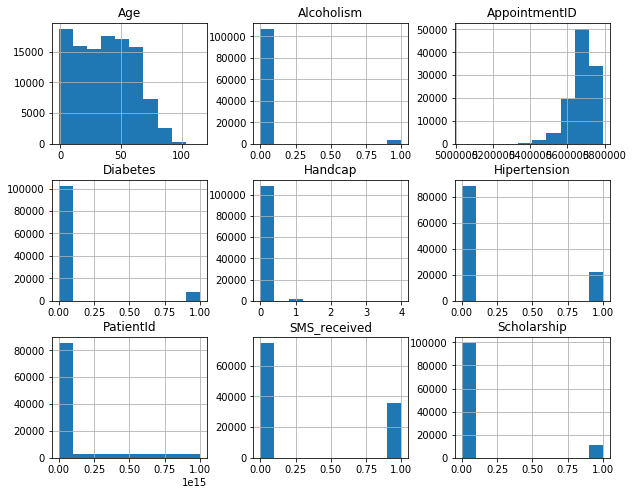

In [5]:
df.hist(figsize=(10,8));



### Data Cleaning


For the sake of this investigation some columns will be dropped out of the dataframe as they wouldn't count as variables of certain of effect on the patient showing up or not. These are Patient ID are Appointment ID.

From these graphs it can be seen that ratio for Alcoholism, Hipertension, Diabetes, Alcoholism and Handcap columns are very high that it might be misleading to draw conclusion based on them. Hence, these columns will be added to the list of the dropped columns in order to narrow down our investigation.

In [6]:
df.drop(['Alcoholism','AppointmentID','Hipertension','Diabetes','Alcoholism','Handcap','PatientId'], axis =1, inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 8 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(3), object(5)
memory usage: 6.7+ MB


Looking at the columns and there types, there is space for improvement to better use them in our investigation. Working out the difference between the Scheduled Day and Appointment Day can give us another variable which we will call later Scheduled Gap which is the number of days between the patient scheduling his appointment and attending it, to see whether that can be related to them showing up.
To do this the data type for both of them has to be changed to datetime format, extract the date part and make sure it's in date format again, so the difference can be counted in days.

In [8]:
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

In [9]:
df['ScheduledDay']= df['ScheduledDay'].dt.date
df['AppointmentDay']= df['AppointmentDay'].dt.date
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 8 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 6.7+ MB


In [11]:
df['scheduled_gap']= df['AppointmentDay'].sub(df['ScheduledDay'])
df['scheduled_gap']=df['scheduled_gap'].dt.days
print(df.info())
print(df['scheduled_gap'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
scheduled_gap     110527 non-null int64
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 7.6+ MB
None
count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: scheduled_gap, dtype: float64


In [12]:
df = df.drop(df[df.scheduled_gap < 0].index)

To remove any scheduled gap less than 0 days.

In [13]:
#In here the No-show column is renamed to abscence,
#the yes and no indicating Abscence are no indicated using
#present and abscent to ease filtering in our following analysis.

df.rename(columns = {'No-show':'Abscence'},inplace = True)
present = df.Abscence == 'No'
abscent = df.Abscence == 'Yes'

As it can be seen in the above code that a new column called 'scheduled_gap' has been added to the data frame with integer values that will be used later in our analysis.

At this stage we are done with our data wrangling and cleaning, and will move to the exploration stage.

<a id='eda'></a>
## Exploratory Data Analysis



### What is the relationship between the Scheduled Gap and the patient showing up to the appointment?

In [14]:
print('Mean number of scheduled gap days for those who made it to the appointment=', df.scheduled_gap[present].mean().round())
print('Mean number of scheduled gap days for those who missed the appointment=',df.scheduled_gap[abscent].mean().round())

Mean number of scheduled gap days for those who made it to the appointment= 9.0
Mean number of scheduled gap days for those who missed the appointment= 16.0


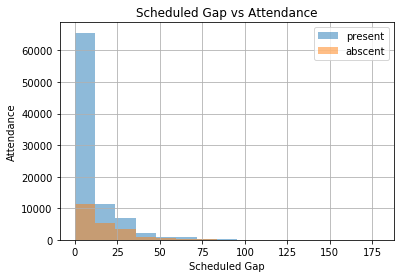

In [15]:
def plotX(df):
    df.scheduled_gap[present].hist(alpha=0.5, bins=15, label='present')
    df.scheduled_gap[abscent].hist(alpha=0.5, bins=15, label='abscent')
    plt.title("Scheduled Gap vs Attendance")
    plt.xlabel('Scheduled Gap')
    plt.ylabel('Attendance')
    plt.legend()
plotX(df)

From these statistical values and graph, the patients who showed up has overall less scheduled gap days with mean value of 9 days, while patient who missed it tend to have more scheduled gap days with mean value of 16 days. In other words, the longer the scheduled gap the more likely the patients will not show up to their appointment.
This is predicted as people who schedule for a long-term would not consider the circumstances that might hinder them from showing up, however, people who schedule for a week or so would have better idea of their time and be more prepared.


### What is the relationship between the Gender and the patient showing up to the appointment?

Gender  Abscence
F       No          57246
        Yes         14591
M       No          30962
        Yes          7723
Name: Abscence, dtype: int64


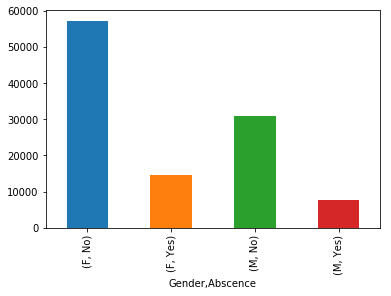

In [16]:
print(df.groupby('Gender').Abscence.value_counts())
df.groupby('Gender').Abscence.value_counts().plot(kind='bar');

The ratio between Females attending and not attending is 57246/14591 i.e. 4:1, and the ratio between Males attending and not attending is 30962/7723 i.e. 4:1 as well. It is true that there overall more women going to the medical appointments, however the ratio between showing and not showing up is relatively the same. Hence, it can be concluded that there is no direct relationship between the Gender and the patient showing up.


### What is the relationship between the Age and the patient showing up to the appointment?

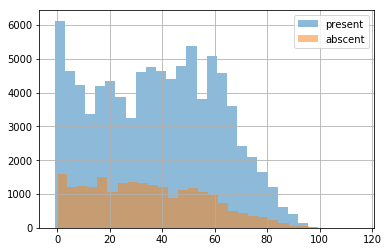

In [17]:
df.Age[present].hist(alpha=0.5, bins=30, label='present')
df.Age[abscent].hist(alpha=0.5, bins=30, label='abscent')
plt.legend();

In [18]:
print('Mean age for those who made it to the appointment=', df.Age[present].mean().round())
print('Mean age for those who missed the appointment=',df.Age[abscent].mean().round())
print('Standard deviation of age for those who made it to the appointment=', df.Age[present].std().round())
print('Standard deviation of age for those who missed the appointment=',df.Age[abscent].std().round())

Mean age for those who made it to the appointment= 38.0
Mean age for those who missed the appointment= 34.0
Standard deviation of age for those who made it to the appointment= 23.0
Standard deviation of age for those who missed the appointment= 22.0


From the graph it appears that the distribution of abscence and presence is the same for both cases. Both are right skewed. And seems to be with the same ratio. The mean values also show this fact as they are quite close to each other 34 and 38 within a spectrum of 115 years old. And again both show relatively similar standard deviation values, which shows that the age distribution is relatively similar for both.

### What is the relationship between the Neighbourhoods and the patient showing up to the appointment?

In this section, data will be extracted into a new dataframe named  Neighbourhood_Dataset, the data in it will be extracted from the df dataframe and analysed separately. The final variable that needs to be calculated is the attendance percentage from each Neighbourhood, in order to verify whether there is a relationship between the patients' Neighbourhoods and them attending the appointment. That can be due to transportation, long distance, or the culture of each neighbourhood.

These are the steps followed to do so:
1. extract the total number of patients in each neighbourhood in a series called freq
2. extract the number of those who showed up in each neighbourhood in a series called present_loc
3. extract the number of those who didn't show up in each neighbourhood in a series called abscent_loc
4. merge the 4 series together in a new dataframe called Neighbourhood_Dataset
5. work out the percentage of those who attended in a new column called attendance_percentage

In [19]:
present_loc = df.Neighbourhood[present].value_counts().to_frame().reset_index()
abscent_loc = df.Neighbourhood[abscent].value_counts().to_frame().reset_index()
freq = df['Neighbourhood'].value_counts().to_frame().reset_index()
present_loc.columns = ['location','count_present']
abscent_loc.columns = ['location','count_abscent']
freq.columns = ['location','count_all']

Neighbourhood_Dataset = pd.merge(present_loc,abscent_loc, how='outer', on='location')
Neighbourhood_Dataset = pd.merge(Neighbourhood_Dataset,freq, how='outer', on='location')
Neighbourhood_Dataset['attendance_percentage']=Neighbourhood_Dataset['count_present']/Neighbourhood_Dataset['count_all']*100
Neighbourhood_Dataset.replace(to_replace = np.nan, value = 0, inplace = True)
Neighbourhood_Dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 5 columns):
location                 81 non-null object
count_present            81 non-null float64
count_abscent            81 non-null float64
count_all                81 non-null int64
attendance_percentage    81 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.8+ KB


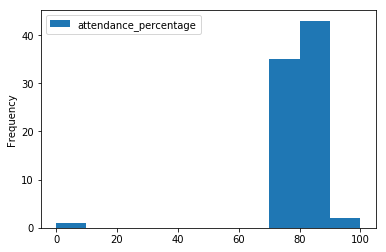

In [20]:
Neighbourhood_Dataset.plot( x='location', y='attendance_percentage', kind='hist');

From the graph, it can be seen that for the 81 neighbourhood, the attendance percentage ranged mainly between 70% and 90%, for almost all of them, with a couple of outliers at 0% and 100%. With that at hand, it doesn't seem that the nieghbourhood has something to do with predicting the patient attendance.

### What is the relationship between the Scholarship and the patient showing up to the appointment?

In [21]:
print(df.groupby('Scholarship').Abscence.value_counts())

Scholarship  Abscence
0            No          79925
             Yes         19736
1            No           8283
             Yes          2578
Name: Abscence, dtype: int64


In this section the df dataframe was grouped by the scholarship to analyse whether the patient having a scholarship would affect their behaviour in terms of showing up. From these values it can be seen that ratio in both cases is relatively the same of approximately 3.4. Which again doesn't show a certain correlation between having a scolarhsip and showing up for the appointment.

<a id='conclusions'></a>
## Conclusions

From the investigation carried out above between the Scheduled Gap, Age, Neighbourhood, Gender, Scholarship and Attendance variables. It can be concluded that the main influence on the Attendance among these variables was 
the Scheduled Gap variable. 

There we saw a clear tendency of showing up for those who scheduled close to the appointment date.

For Age there were more young aged patients overall but there was no clear correlation between age and attendance.

For Neighbourhood, Gender and Scholarship they did not seem to have direct relation ship with the patient showing up.

Some of the limitations are that the number of people who had scholarships is relatively low compared to those who didn't have. So drawing a conclusion based on the given data might not be representative of the real scenario. 
Same goes for the Alcoholism and Diabetes columns the number of alcoholic and diabetic people is too low that it is not realstic to draw conclusion based on these values.



In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0